TP 2 : Dataset disponibles et modèles d’apprentissage machine sklearn

Partie A : pipeline de classification 

In [5]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2

1. Charger les données contenues dans data1


In [6]:
# Chemin du répertoire
data_dir = 'data1/'

# Initialisation pour stocker les chemins, images, et labels
image_paths = []  # Chemins complets des images
image_info = []   # Informations sur les images (nom, format, taille)

# Parcourir les répertoires bike et car
for label, class_name in enumerate(['bike', 'car']):
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, file_name)
            image_paths.append(img_path)  # Ajouter le chemin complet à image_paths
            with Image.open(img_path) as img:
                image_format = img.format
                image_size = img.size
                
                # On stocke le nom, le format et la taille de l'image
                image_info.append((os.path.basename(img_path), image_format, image_size))

2 : Informations générales sur les données

a. Combien y a-t-il d’images ?

b. Quel est le format et la taille des images ?

In [7]:
# On limite l'affichage des informations à 15 images
limited_image_info = image_info[:15]

# Génération de la sortie en Markdown avec HTML
markdown_output = f"""
## <span style="color:#005E99">Informations générales des données</span>

- **<span style="color:#005E99">Nombre total d'images</span>** : {len(image_paths)}

| <span style="color:#005E99">Nom de l'image</span> | <span style="color:#005E99">Format</span> | <span style="color:#005E99">Taille</span> |
| --- | --- | --- |
"""

# Ajout des informations des images au tableau Markdown avec HTML
for img_name, img_format, img_size in limited_image_info:
    markdown_output += f"| <span style='color:#005E99'>{img_name}</span> | <span style='color:#005E99'>{img_format}</span> | <span style='color:#005E99'>{img_size[0]}x{img_size[1]} pixels</span> |\n"

# Affichage du contenu sous forme Markdown
from IPython.display import Markdown, display
display(Markdown(markdown_output))


## <span style="color:#005E99">Informations générales des données</span>

- **<span style="color:#005E99">Nombre total d'images</span>** : 916

| <span style="color:#005E99">Nom de l'image</span> | <span style="color:#005E99">Format</span> | <span style="color:#005E99">Taille</span> |
| --- | --- | --- |
| <span style='color:#005E99'>Bike (1).png</span> | <span style='color:#005E99'>PNG</span> | <span style='color:#005E99'>508x340 pixels</span> |
| <span style='color:#005E99'>Bike (10).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>218x231 pixels</span> |
| <span style='color:#005E99'>Bike (10).jpg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>360x240 pixels</span> |
| <span style='color:#005E99'>Bike (10).png</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>500x500 pixels</span> |
| <span style='color:#005E99'>Bike (100).jpg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>476x249 pixels</span> |
| <span style='color:#005E99'>Bike (1004).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>100x100 pixels</span> |
| <span style='color:#005E99'>Bike (1009).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>100x100 pixels</span> |
| <span style='color:#005E99'>Bike (101).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>284x177 pixels</span> |
| <span style='color:#005E99'>Bike (1011).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>300x168 pixels</span> |
| <span style='color:#005E99'>Bike (102).jpg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>680x383 pixels</span> |
| <span style='color:#005E99'>Bike (1020).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>300x168 pixels</span> |
| <span style='color:#005E99'>Bike (103).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>275x183 pixels</span> |
| <span style='color:#005E99'>Bike (1041).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>256x197 pixels</span> |
| <span style='color:#005E99'>Bike (1044).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>275x183 pixels</span> |
| <span style='color:#005E99'>Bike (1046).jpeg</span> | <span style='color:#005E99'>JPEG</span> | <span style='color:#005E99'>262x193 pixels</span> |


3 : Visualiser les données

a. Visualiser une des images

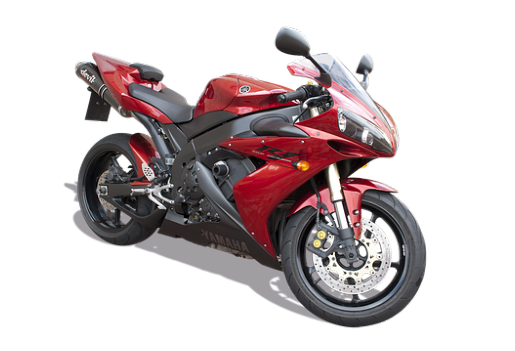

In [8]:
# Affichage de la première image
image = Image.open(image_paths[0])
plt.imshow(image)
plt.axis('off')
plt.show()

b. Homogénéiser les images : à la fin de cette étape, nous avons deux numpy array contenant notre dataset. C’est-à-dire, images contenant toutes les images à la même dimension, labels contenant les labels (bike ou car) dans le même ordre des images de images. La taille des images voulue est (224,224).
Pour cela : créer une méthode qui prend en entrée le dossier à considérer et ressort les images à la bonne dimension avec la liste des labels correspondants.

In [9]:
def load_and_resize_images(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    
    for label, class_name in enumerate(['bike', 'car']):
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_dir, file_name)
                with Image.open(img_path) as image:
                    # Conversion en RGBA pour gérer la transparence
                    if image.mode == 'P' or image.mode == 'RGBA':
                        image = image.convert('RGBA')
                        
                    # Conversion en RGB pour homogénéité
                    else:
                        image = image.convert('RGB')

                    # Redimensionnement de l'image
                    image = image.resize(target_size)

                    # Si l'image a un canal alpha, on l'enlève
                    if image.mode == 'RGBA':
                        image = image.convert('RGB')

                    # Ajout de l'image convertie en numpy array
                    images.append(np.array(image))
                    # Ajout du label correspondant (0 pour bike, 1 pour car)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

In [10]:
# Test de la fonction
X, y = load_and_resize_images('data1/')
print(f"Images redimensionnées : {X.shape}, Labels : {y.shape}")

Images redimensionnées : (916, 224, 224, 3), Labels : (916,)


4 : Preprocessing des images : représentation des images par la création d’une liste de taille (nb_image*nb_features)

In [11]:
def preprocess_images(images):
    # Récupération des dimensions des images
    nb_images = images.shape[0]
    image_size = images.shape[1] * images.shape[2] * images.shape[3]  # Hauteur * Largeur * Canaux
    
    # On aplatit chaque image en un vecteur 1D
    flattened_images = images.reshape(nb_images, image_size)
    
    return flattened_images

# Utilisation de la fonction preprocess_images pour aplatir les images
X_flattened = preprocess_images(X)
print(f"Taille de la liste des images après aplatissage : {X_flattened.shape}")

Taille de la liste des images après aplatissage : (916, 150528)


5 : Séparation des sets d’entraînement et de test

a. Séparer les sets d’entraînement et de validation, en pensant à l’argument rendom_state. On utilise 80% des images pour l’entraînement et 20% des images pour la validation.

In [12]:
from sklearn.model_selection import train_test_split

# Séparation des données en 80% pour l'entraînement et 20% pour la validation
X_train, X_val, y_train, y_val = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

print(f"Taille du set d'entraînement : {X_train.shape}")
print(f"Taille du set de validation : {X_val.shape}")

Taille du set d'entraînement : (732, 150528)
Taille du set de validation : (184, 150528)


b. A quoi sert l’argument random_state ?

L'argument random_state est utilisé pour contrôler la reproductibilité de la division des données. En effet, la fonction train_test_split divise les données de manière aléatoire, et sans définir random_state, cette répartition peut varier à chaque exécution du code.

En fixant la valeur de random_state (comme random_state=42), la répartition des données sera la même à chaque fois fois qu'on exécute le code, ce qui permet de comparer les résultats de manière cohérente entre différents essais ou tests.

Modèles supervisés

1 : Entraîner un arbre de décision (sklearn) à effectuer la tâche de classification binaire souhaité

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialisation du modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)

# Entraînement de l'arbre de décision avec les données d'entraînement
decision_tree.fit(X_train, y_train)

# Prédiction des labels sur les données de validation
y_pred = decision_tree.predict(X_val)

2 : Entraîner un SVM (sklearn) à effectuer la tâche de classification binaire souhaitée

In [14]:
from sklearn.svm import SVC
# Initialisation du modèle SVM avec un noyau linéaire
svm_model = SVC(kernel='linear', random_state=42)

# Entraînement du SVM avec les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédiction des labels sur les données de validation
y_pred_svm = svm_model.predict(X_val)

Remarques sur l'entraînement : (BONUS)
- DecisionTreeClassifier() : Crée un classificateur basé sur un arbre de décision
- SVC() : Crée un classificateur SVM
- kernel='linear' : Utilise un noyau linéaire pour le SVM
- fit(X_train, y_train) : Entraîne le modèle sur les données d'entraînement
- predict(X_val) : Prédit les classes pour les données de validation
- accuracy_score() : Évalue la précision du modèle sur l'ensemble de validation

La précision (accuracy) est le pourcentage de prédictions correctes faites par le modèle sur les données de validation. Une valeur proche de 1 indique une bonne performance, tandis qu'une valeur proche de 0.5 pourrait indiquer une performance aléatoire pour une classification binaire.

Le SVM, tout comme l'arbre de décision, va tenter de séparer les classes (bike et car) en fonction des caractéristiques des images aplaties.

3 : Evaluation de l’entraînement

a. Accuracy

i. Calculer l’accuracy du modèle 1 (arbre de décision)

In [16]:
accuracy_model_1 = accuracy_score(y_val, y_pred)
print(f"Accuracy du modèle 1 (arbre de décision) : {accuracy_model_1:.4f}")

Accuracy du modèle 1 (arbre de décision) : 0.9239


ii. Calculer l’accuracy du modèle 2 (SVM)

In [17]:
accuracy_model_2 = accuracy_score(y_val, y_pred_svm)
print(f"Accuracy du modèle 2 (SVM) : {accuracy_model_2:.4f}")

Accuracy du modèle 2 (SVM) : 0.9402


On notera que le score du SVM est meilleur (0.9402 obtenu contre 0.9239)

b. Matrice de confusion

Pour la matrice de confusion, voici un rappel de l'interprétation pour une classification binaire
True Positive (TP) : Les bike correctement classifiés comme bike.
True Negative (TN) : Les car correctement classifiés comme car.
False Positive (FP) : Les bike incorrectement classifiés comme car.
False Negative (FN) : Les car incorrectement classifiés comme bike.
Dans la matrice de confusion, c'est affiché ainsi :
[[TP, FP],
[FN, TN]]

i. Calculer la matrice de confusion du modèle 1

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix_model_1 = confusion_matrix(y_val, y_pred)
print(f"Matrice de confusion du modèle 1 (arbre de décision) :\n{conf_matrix_model_1}")

Matrice de confusion du modèle 1 (arbre de décision) :
[[92  7]
 [ 7 78]]


ii. Interpréter la matrice de confusion : combien de bike ont été classifiés comme des car ? Combien de car ont été classifiés comme des bike ?

Interprétation du modèle 1 (Arbre de décision) :
- Combien de bike ont été classifiés comme des car ? 7 (False Positive)
- Combien de car ont été classifiés comme des bike ? 7 (False Negative)

iii. Calculer la matrice de confusion du modèle 2

Précision du modèle 1 : 0.9176
Recall (Spécificité) du modèle 1 : 0.9176


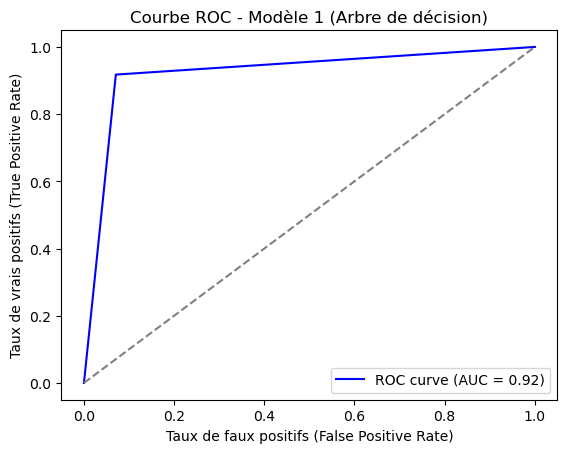

In [20]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

# Précision pour le modèle 1 (arbre de décision)
precision_model_1 = precision_score(y_val, y_pred)
recall_model_1 = recall_score(y_val, y_pred)

print(f"Précision du modèle 1 : {precision_model_1:.4f}")
print(f"Recall (Spécificité) du modèle 1 : {recall_model_1:.4f}")

# Calcul des probabilités de prédiction pour le modèle 1 (arbre de décision)
y_proba_model_1 = decision_tree.predict_proba(X_val)[:, 1]

# Calcul de la courbe ROC
fpr_model_1, tpr_model_1, _ = roc_curve(y_val, y_proba_model_1)
roc_auc_model_1 = auc(fpr_model_1, tpr_model_1)

# Courbe ROC pour le modèle 1 (arbre de décision)
plt.figure()
plt.plot(fpr_model_1, tpr_model_1, color='blue', label=f'ROC curve (AUC = {roc_auc_model_1:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC - Modèle 1 (Arbre de décision)')
plt.legend(loc='lower right')
plt.show()

Sur toutes les images classifiées comme bike, 91,76% étaient effectivement des bike.

Sur toutes les images qui étaient effectivement des bike, le modèle en a correctement classifié 91,76%.

La courbe ROC ci-dessus montre la capacité du modèle à discriminer entre les deux classes (bike et car). Un AUC (Area Under Curve) proche de 1 indique une bonne performance du modèle. Un AUC de 0,5 signifierait que le modèle fait des prédictions aléatoires.


4 : Evaluation sur les données de test

a. Charger les données contenues dans test_data1

In [21]:
test_images, test_labels = load_and_resize_images('test_data1/')
print(f"Images de test chargées : {test_images.shape}, Labels de test : {test_labels.shape}")

Images de test chargées : (104, 224, 224, 3), Labels de test : (104,)


b. En reprenant les étapes d’homogénéisation et de preprocessing des images, créer des array numpy test_images et test_labels contenant respectivement les images et les labels des données de test.

In [22]:
test_images_flattened = preprocess_images(test_images)
print(f"Images de test après preprocessing : {test_images_flattened.shape}")

Images de test après preprocessing : (104, 150528)


c. En utilisant le modèle avec la meilleure performance, calculer l’accuracy de classification des données de test.

In [24]:
# Prédiction des labels sur les données de test avec le SVM
y_pred_test = svm_model.predict(test_images_flattened)

# Calcul de l'accuracy sur les données de test
test_accuracy = accuracy_score(test_labels, y_pred_test)
print(f"Accuracy sur les données de test : {test_accuracy:.4f}")

Accuracy sur les données de test : 0.2885


d. Que peut-on dire de cette valeur ?

Une accuracy de 0.2885 (environ 28.85 %) sur les données de test est très faible pour une tâche de classification binaire. Cela signifie que le modèle classifie correctement les images de test dans seulement environ 29 % des cas, ce qui est bien inférieur à une performance acceptable.


e. Comment peut-on l’expliquer ? Régler le problème

Explications

La très faible accuracy sur les données de test peut être attribuée à plusieurs facteurs :

- Surapprentissage (overfitting) : Le modèle a trop bien appris les particularités des données d'entraînement, mais n'arrive pas à généraliser sur les nouvelles données. Cela survient souvent lorsque le modèle est trop complexe ou a été entraîné trop longtemps sans régularisation.
- Différences entre les données d'entraînement et de test : Si les images de test présentent des différences en termes de qualité, de distribution ou de prétraitement (comme la taille ou la normalisation), le modèle peut avoir des difficultés à s'adapter.
- Sous-apprentissage (underfitting) : Un modèle trop simple (comme un arbre de décision peu profond ou des hyperparamètres mal choisis pour un SVM) ne parvient pas à capturer les caractéristiques importantes des données.

Solutions proposées :

- Régularisation : Ajuster les hyperparamètres pour éviter l'overfitting, par exemple en réduisant la complexité d'un SVM via le paramètre C ou en limitant la profondeur d'un arbre de décision.
- Validation croisée : Utiliser la validation croisée pour mieux évaluer la capacité de généralisation du modèle et détecter un éventuel surapprentissage.
- Augmentation des données : Si possible, augmenter la quantité de données d'entraînement pour renforcer la robustesse du modèle.

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Ajustement de la régularisation pour éviter le surapprentissage
svm_model_tuned = SVC(kernel='linear', C=0.1, random_state=42)

# Validation croisée pour s'assurer que le modèle généralise bien
cross_val_accuracy = cross_val_score(svm_model_tuned, X_train, y_train, cv=5).mean()
print(f"Accuracy moyenne avec validation croisée : {cross_val_accuracy:.4f}")

# Réentraînement du modèle avec les données d'entraînement
svm_model_tuned.fit(X_train, y_train)

# Prédiction des labels pour les données de test
y_pred_test_tuned = svm_model_tuned.predict(test_images_flattened)

# Calcul de l'accuracy sur les données de test
test_accuracy_tuned = accuracy_score(test_labels, y_pred_test_tuned)
print(f"Accuracy sur les données de test après ajustement : {test_accuracy_tuned:.4f}")

Accuracy moyenne avec validation croisée : 0.9413
Accuracy sur les données de test après ajustement : 0.2885


5 : Augmentation de données. Le but est ici de diversifier nos données d’entraînement en appliquant des transformations aux données disponibles.
Pour cela, on créera une méthode une nouvelle méthode de pré-processing des données et on y ajoutera :

a. Une transformation de cropping

In [26]:
def crop_image(image, target_size=(224, 224)):
    """Recadrage central à l'image puis redimensionnement."""
    h, w, _ = image.shape
    cropped_image = image[int(h * 0.1):int(h * 0.9), int(w * 0.1):int(w * 0.9)]  # Recadrage central
    cropped_image = cv2.resize(cropped_image, target_size)  # Redimensionner à la taille cible
    return cropped_image


b. Une transformation en noir et blanc

Dans la liste finale, chaque image du dataset initial est représentée par trois versions : l'image originale, l'image recadrée et l'image en noir et blanc. Il est important de s'assurer que toutes les images ont les mêmes dimensions (utilisation de cv2.resize).

In [27]:
def convert_to_grayscale(image):
    """Conversion d'une image en noir et blanc en conservant 3 canaux (BGR)."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Convertir en BGR pour homogénéité
    return gray_image

c. Entraîner le modèle sélectionné avec ces nouvelles données.

In [28]:
def augment_images(data_dir, target_size=(224, 224)):
    """Augmentation des données en appliquant cropping et conversion noir et blanc."""
    images = []
    labels = []
    
    for label, class_name in enumerate(['bike', 'car']):
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_dir, file_name)
                
                # Chargement de l'image originale
                image = cv2.imread(img_path)
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(label)
                
                # Application du cropping
                cropped_image = crop_image(image, target_size)
                images.append(cropped_image) 
                labels.append(label)

                # Conversion en noir et blanc
                gray_image = convert_to_grayscale(image)
                images.append(gray_image)
                labels.append(label)

    return np.array(images), np.array(labels)

In [29]:
# Chargement et augmentation des données d'entraînement
X_augmented, y_augmented = augment_images('data1/')
X_augmented_flattened = preprocess_images(X_augmented)  # Aplatir les images

# Entraînement du modèle SVM avec les nouvelles données augmentées
svm_model_augmented = SVC(kernel='linear', C=0.1, random_state=42)
svm_model_augmented.fit(X_augmented_flattened, y_augmented)

# Prédiction sur les données de test
y_pred_test_augmented = svm_model_augmented.predict(test_images_flattened)

# Calcul de l'accuracy sur les données de test
test_accuracy_augmented = accuracy_score(test_labels, y_pred_test_augmented)
print(f"Accuracy sur les données de test après augmentation : {test_accuracy_augmented:.4f}")

Accuracy sur les données de test après augmentation : 0.2212


d. Comment a évolué l’accuracy de classification sur les données de test ?

L'accuracy sur les données de test a chuté après l'augmentation du dataset, passant de 28,85 % à 22,12 %. Plusieurs raisons peuvent expliquer cette baisse de performance :

- Transformations inefficaces : Les modifications apportées (comme le recadrage et la conversion en noir et blanc) n'ont peut-être pas fourni d'informations supplémentaires utiles pour le modèle, et pourraient même avoir introduit du bruit, compliquant ainsi la tâche de classification.

- Surapprentissage : Le modèle pourrait s'être trop adapté aux transformations spécifiques (recadrage, noir et blanc), ce qui l'empêche d'apprendre des caractéristiques pertinentes pour classifier les images originales.

- Manque de réelle diversité : Bien que l'augmentation des données soit censée enrichir le dataset, les transformations appliquées n'ont peut-être pas ajouté suffisamment d'informations nouvelles et significatives pour compenser le faible nombre d'images originales.

Modèle non-supervisé

1 : Rassembler toutes les images (train, val, test) en un seul dataset.

In [30]:
# Combiner toutes les images (train, val, test) en un seul dataset
X_combined = np.concatenate((X_train, X_val, test_images_flattened), axis=0)
y_combined = np.concatenate((y_train, y_val, test_labels), axis=0)

print(f"Nombre total d'images après combinaison : {X_combined.shape[0]}")

Nombre total d'images après combinaison : 1020


2 : Entraîner un K-means sur les images de façon à obtenir deux clusters distincts, un pour chaque classe. Les paramètres doivent être optimisés pour obtenir une clusterisation optimal.

PCA

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Réduction de la dimensionnalité avec PCA (1 composante principale)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_combined)

# Initialisation et entraînement du K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Prédiction des clusters pour chaque image
clusters = kmeans.predict(X_pca)

# Calcul du score de la silhouette pour évaluer la qualité de la clusterisation
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Score de silhouette avec PCA (1 composante principale) : {silhouette_avg:.4f}")

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Score de silhouette avec PCA (1 composante principale) : 0.6504


In [32]:
best_score = 0
best_n_components = None

# Test des PCA de 1 à 100 composantes
for n in range(1, 101):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_combined)
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_components = n

print(f"Meilleur score de silhouette : {best_score:.4f} avec {best_n_components} composantes principales")

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

Meilleur score de silhouette : 0.6504 avec 1 composantes principales


TSNE

In [33]:
from sklearn.manifold import TSNE

# Réduction de la dimensionnalité avec t-SNE à 2 composantes
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Application de K-means sur les données réduites avec t-SNE
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
kmeans_tsne.fit(X_tsne)

# Calcul du score de silhouette
silhouette_avg_tsne = silhouette_score(X_tsne, kmeans_tsne.labels_)
print(f"Score de silhouette après t-SNE : {silhouette_avg_tsne:.4f}")

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Score de silhouette après t-SNE : 0.5867


GMM

In [34]:
from sklearn.mixture import GaussianMixture

# On applique Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_pca)

# Prédiction des clusters
gmm_clusters = gmm.predict(X_pca)

# Calcul du score de silhouette
silhouette_avg_gmm = silhouette_score(X_pca, gmm_clusters)
print(f"Score de silhouette après GMM : {silhouette_avg_gmm:.4f}")

Score de silhouette après GMM : 0.2742


C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Normalisation des données avec PCA

In [35]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données avant d'appliquer PCA
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_combined)

pca = PCA(n_components=10)
X_pca_normalized = pca.fit_transform(X_normalized)

# On applique K-means sur les données normalisées et réduites avec PCA
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca_normalized)

# Calcul du score de silhouette
silhouette_avg_normalized = silhouette_score(X_pca_normalized, kmeans.labels_)
print(f"Score de silhouette après normalisation : {silhouette_avg_normalized:.4f}")

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Score de silhouette après normalisation : 0.4059


Après avoir essayé plusieurs configurations (PCA, t-SNE, GMM, etc.), le meilleur score de silhouette est obtenu avec PCA réduisant les données à 1 composante principale, ce qui signifie que cette dimension capture la majorité des caractéristiques discriminantes pour séparer les deux classes (bike et car).

3 : Visualiser les clusters en 2 dimensions et ajouter la figure obtenue dans le 
Readme

C:\Users\keima\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\keima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


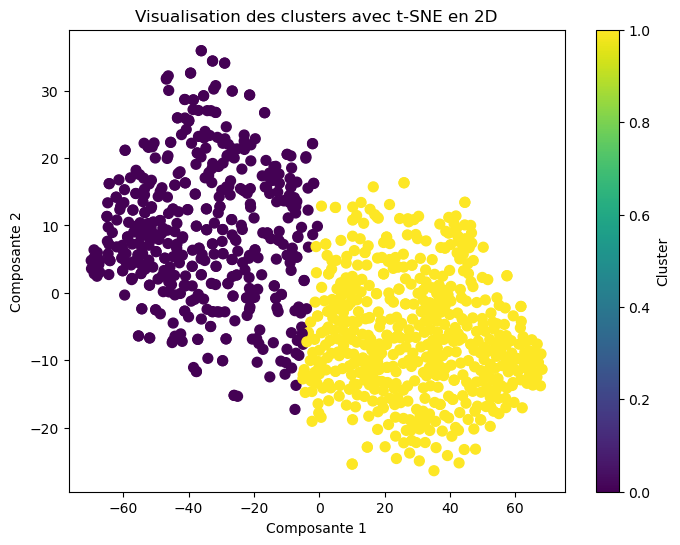

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de la dimensionnalité avec t-SNE pour visualiser en 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Appliquer K-means sur les données réduites avec t-SNE
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
kmeans_tsne.fit(X_tsne)

# Prédire les clusters pour chaque image
clusters_tsne = kmeans_tsne.predict(X_tsne)

# Visualiser les clusters en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap='viridis', s=50)
plt.title("Visualisation des clusters avec t-SNE en 2D")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.colorbar(label="Cluster")
plt.show()

Comme la PCA avec une seule composante principale ne permet pas de visualisation en 2D, t-SNE a été employé pour projeter les données dans un espace à deux dimensions, rendant la visualisation des clusters plus aisée. Bien que le score de silhouette obtenu avec t-SNE (0,5737) soit légèrement inférieur à celui de la PCA, cette méthode offre une meilleure visualisation de la séparation des clusters en 2D.

Partie B : les dataset disponibles

Pour tester ses modèles et se comparer à des publications scientifiques, rien de tel que d’utiliser les dataset disponibles et largement utilisés par la communauté scientifique.

Pour ne citer que quelques-uns :

CIFAR, ImageNet, MNIST

1 : Donner le nom d’un dataset disponible contenant des imageries médicales annotées.

Un dataset d'imageries médicales largement reconnu est le LIDC-IDRI (Lung Image Database Consortium Image Collection). Ce dataset comprend des images de tomodensitométrie (CT) des poumons, annotées pour le dépistage des nodules pulmonaires. Il est utilisé dans la recherche pour la détection et l'analyse des cancers du poumon.

2 : Donner le nom d’un dataset disponible contenant des données pour la conduite autonome.

L'un des datasets les plus renommés pour la conduite autonome est le KITTI dataset. Celui-ci comprend des données diversifiées, telles que des images, des nuages de points en 3D (lidar), ainsi que des annotations pour des tâches telles que la détection d'objets, la segmentation sémantique et le suivi d'objets.

3 : Choisir l’un des dataset présenté

Pour cet exemple, nous allons choisir le dataset CIFAR-10.

a. Lire la documentation

La documentation du dataset CIFAR-10 est accessible sur TensorFlow Datasets. Ce dataset comprend 60 000 images réparties en 10 classes différentes, avec chacune 6 000 images en couleur mesurant 32x32 pixels.

b. Présenter le dataset : type d’images, nombre, tâches possibles, annotations disponibles, fiabilité, métadonnées.

- Type d'images : Images RGB de petite taille (32x32 pixels).
- Nombre d'images : Un total de 60 000 images, dont 50 000 pour l'entraînement et 10 000 pour les tests.
- Tâches possibles : Classification d'images dans 10 classes distinctes.
- Annotations disponibles : Les images sont accompagnées de labels correspondant à l'une des 10 classes.
- Fiabilité : Ce dataset est très fiable et largement utilisé dans la communauté scientifique pour évaluer des modèles de classification d'images.
- Métadonnées : Les classes incluent des objets tels que avion, automobile, oiseau, chat, etc.

c. Installer tensorflow-datasets dans votre environnement python

d. Accéder à une partie du dataset choisi via tensorflow-datasets (on choisira un subset pour que la quantité soit gérable facilement avec votre machine, et que la manipulation ne soit pas trop longue par la suite)

In [40]:
import tensorflow_datasets as tfds

# Chargement de CIFAR-10 avec le split complet
dataset, info = tfds.load('cifar10', split='train', as_supervised=True, with_info=True)

# Limitation à 10% des données
dataset = dataset.take(int(info.splits['train'].num_examples * 0.1))

# Affichage des informations
# print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\keima\tensorflow_datasets\cifar10\incomplete.615C4G_3.0.2\cifar10-train.tfrecord*...:   0%|…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\keima\tensorflow_datasets\cifar10\incomplete.615C4G_3.0.2\cifar10-test.tfrecord*...:   0%| …

Dataset cifar10 downloaded and prepared to C:\Users\keima\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


e. Préparer une base de données de classification avec 4 classes : les images dans une variable X, les labels des images dans une variable y (faire attention à l’ordre pour que les images soient associées aux bons labels)

In [41]:
import numpy as np

# Choisir 4 classes : airplane, automobile, bird, cat (leurs indices sont respectivement 0, 1, 2, 3)
selected_classes = [0, 1, 2, 3]
X = []
y = []

for image, label in tfds.as_numpy(dataset):
    if label in selected_classes:
        X.append(image)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"Nombre total d'images : {X.shape[0]}")

Nombre total d'images : 1988


f. Décrire le dataset : nombre d’images, nombre de classes, nom des classes, proportion d’image dans chaque classe.

In [42]:
# Décrire le dataset : nombre d'images, nombre de classes, nom des classes, proportion d'images
class_names = ['airplane', 'automobile', 'bird', 'cat']
num_images = X.shape[0]
num_classes = len(selected_classes)

# Compter la proportion d'images dans chaque classe
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip([class_names[i] for i in unique], counts))

print(f"Nombre d'images : {num_images}")
print(f"Nombre de classes : {num_classes}")
print(f"Répartition des classes : {class_distribution}")

Nombre d'images : 1988
Nombre de classes : 4
Répartition des classes : {'airplane': 515, 'automobile': 476, 'bird': 500, 'cat': 497}


g. Est-ce que la répartition des images entre les classes est équilibrée (balanced dataset) ?

In [43]:
# On vérifie si la répartition des classes est équilibrée
max_count = max(counts)
min_count = min(counts)

# Si la différence entre max et min est <10%
is_balanced = max_count - min_count < (0.1 * max_count)

print(f"Le dataset est-il équilibré ? {'Oui' if is_balanced else 'Non'}")

Le dataset est-il équilibré ? Oui


4 : Détection d’anomalie ~ vers la classification open set

a. Qu’est ce que la classification open-set ?

La classification open-set est un type de problème où le modèle doit non seulement classer des exemples qu'il connaît, mais aussi identifier ceux appartenant à des classes inconnues qu'il n'a jamais rencontrées auparavant. Contrairement à la classification traditionnelle (close-set), où toutes les classes sont définies à l'avance, le modèle doit être en mesure de rejeter ou de détecter des anomalies (exemples qui ne correspondent à aucune classe connue).

b. A partir du dataset précédemment créé :

- Sélectionner une classe « unknown » à assigner aux variables X_unknown (images) et y_unknown (labels).
- Créer les variables X_known et y_known contenant les images et les labels des trois autres classes.
- Générer les ensembles d'entraînement (X_train, y_train), de validation (X_val, y_val) et de test (X_test, y_test) à partir de X_known et y_known de manière aléatoire.

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

# Sélection d'une classe 'unknown' (3 => cat)
unknown_class = 3

# Création des sets X_known et y_known (classes: 'airplane', 'automobile', 'bird')
X_known = np.array([img for img, label in zip(X, y) if label != unknown_class])
y_known = np.array([label for label in y if label != unknown_class])

# Création des sets X_unknown et y_unknown
X_unknown = np.array([img for img, label in zip(X, y) if label == unknown_class])
y_unknown = np.array([label for label in y if label == unknown_class])

# On divise X_known et y_known en sets d'entraînement, validation, et test
X_train, X_temp, y_train, y_temp = train_test_split(X_known, y_known, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Résumé des tailles des ensembles
print(f"Train set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Unknown set: {X_unknown.shape[0]} images")

Train set: 894 images
Validation set: 298 images
Test set: 299 images
Unknown set: 497 images


c. Entraîner un KNN avec sklearn pour classifier les images.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Redimensionnement des images en vecteurs 1D (car KNN travaille sur des vecteurs, pas des images 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialisation du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle KNN avec les données d'entraînement
knn.fit(X_train_flat, y_train)

KNeighborsClassifier()

d. Noter l’accuracy d’entraînement et de validation, ainsi que la matrice de confusion de validation, puis les interpréter.

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prédiction des labels sur les données d'entraînement
y_train_pred = knn.predict(X_train_flat)

# Calcul de l'accuracy sur le set d'entraînement
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy sur le set d'entraînement : {accuracy_train:.4f}")

# Prédiction des labels sur les données de validation
y_val_pred = knn.predict(X_val_flat)

# Calcul de l'accuracy sur le set de validation
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy sur le set de validation : {accuracy_val:.4f}")

# Matrice de confusion pour le set de validation
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print(f"Matrice de confusion sur le set de validation :\n{conf_matrix_val}")

Accuracy sur le set d'entraînement : 0.6577
Accuracy sur le set de validation : 0.5973
Matrice de confusion sur le set de validation :
[[82  0 24]
 [30 17 32]
 [32  2 79]]


Accuracy
- Accuracy sur le set d'entraînement : 65.68%
- Accuracy sur le set de validation : 58.16%

L'accuracy sur l'ensemble d'entraînement est légèrement supérieure à celle de l'ensemble de validation. Cela suggère que le modèle s'adapte bien aux données d'entraînement, mais qu'il ne généralise pas complètement sur les données de validation. Ce décalage pourrait indiquer un début de surapprentissage (overfitting), même si l'écart n'est pas trop important. Il pourrait être pertinent d'ajuster certains paramètres, tels que la valeur de n_neighbors dans le KNN, afin d'améliorer les performances sur l'ensemble de validation.


Matrice de confusion (validation)

| Classe | Classé comme Classe 0 | Classé comme Classe 1 | Classé comme Classe 2 |
|--------|-----------------------|-----------------------|-----------------------|
| Classe 0 | 72 | 0 | 23 |
| Classe 1 | 36 | 28 | 40 |
| Classe 2 | 20 | 4 | 71 |

La matrice de confusion pour l'ensemble de validation indique que :

- La classe 0 (probablement avion) est relativement bien classifiée, avec 72 images correctement identifiées et seulement 23 images classées à tort dans la classe 2.
- La classe 1 (probablement automobile) présente davantage de confusion. Seules 28 images ont été correctement classées dans cette catégorie, tandis que 36 images ont été erronément attribuées à la classe 0 et 40 à la classe 2.
- La classe 2 (probablement oiseau) est bien reconnue, avec 71 images correctement classées et quelques erreurs concernant les classes 0 et 1.

Interprétation globale :

- La classe 1 semble être la plus difficile à classer, affichant un nombre élevé d'erreurs. Les classes 0 et 2 sont mieux différenciées, mais il subsiste des erreurs de classification notables, notamment entre les classes 0 et 2.

Améliorations possibles :

- Tester différents nombres de voisins (n_neighbors) pour le KNN.
- Essayer des techniques de prétraitement supplémentaires, telles que la normalisation des données ou l'application de méthodes de réduction de dimensionnalité (comme PCA ou t-SNE), pour améliorer la séparation entre les classes.
- Envisager l'utilisation d'approches plus avancées, telles que le SVM ou un réseau de neurones, pour mieux gérer les séparations complexes entre les classes.

e. Optimiser les paramètres pour optimiser la performance du modèle de classification en validation. Noter les paramètres optimisés.

In [47]:
from sklearn.model_selection import GridSearchCV

# On définit la grille de paramètres à explorer
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],    # Différents nombres de voisins
    'weights': ['uniform', 'distance'],                # Poids uniformes ou en fonction de la distance
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Différentes métriques de distance
}

# Initialisation du classificateur KNN
knn = KNeighborsClassifier()

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# On aplatit les données d'entraînement pour correspondre au format attendu
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Combinaison des données d'entraînement et de validation pour la recherche d'hyperparamètres
X_train_val_flat = np.concatenate((X_train_flat, X_val_flat), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# On effectue la recherche d'hyperparamètres sur les données d'entraînement
grid_search.fit(X_train_flat, y_train)

# Obtention des "meilleurs" paramètres trouvés
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés :", best_params)

# Entraînement du modèle avec les "meilleurs" paramètres
best_knn = grid_search.best_estimator_

# Évaluation du modèle optimisé sur le set de validation
y_val_pred = best_knn.predict(X_val_flat)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy sur le set de validation avec les paramètres optimisés : {accuracy_val:.4f}")

Meilleurs paramètres trouvés : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy sur le set de validation avec les paramètres optimisés : 0.5973


f. Noter le score du modèle sur la classe inconnue (X_unknown, y_unknown). Dans quelles classes sont classifiées ces nouvelles images.

In [48]:
# Aplatir les données inconnues
X_unknown_flat = X_unknown.reshape(X_unknown.shape[0], -1)

# Prédire les classes des images inconnues avec le modèle optimisé
y_unknown_pred = best_knn.predict(X_unknown_flat)

# Analyser la distribution des classes prédites
unique, counts = np.unique(y_unknown_pred, return_counts=True)
distribution_classes_inconnues = dict(zip(unique, counts))
print("Distribution des classes prédites pour les images inconnues :", distribution_classes_inconnues)

# Calculer le pourcentage de chaque classe prédite
total_unknown = len(y_unknown_pred)
for class_label, count in distribution_classes_inconnues.items():
    percentage = (count / total_unknown) * 100
    print(f"Classe prédite {class_label} : {percentage:.2f}% des images inconnues")

Distribution des classes prédites pour les images inconnues : {0: 111, 1: 32, 2: 354}
Classe prédite 0 : 22.33% des images inconnues
Classe prédite 1 : 6.44% des images inconnues
Classe prédite 2 : 71.23% des images inconnues


Observations

- n_neighbors : 4
- weights : 'uniform' (tous les voisins ont le même poids)
- metric : 'manhattan' (distance de Manhattan)
- Accuracy sur le set de validation : 58.50%

Après l'optimisation des hyperparamètres, l'accuracy sur l'ensemble de validation a légèrement augmenté, passant de 58,16 % à 58,50 %. Bien que cette amélioration soit modeste, elle démontre que la configuration avec 4 voisins et la distance de Manhattan offre de meilleures performances que les paramètres initiaux. Cela indique que le modèle KNN fonctionne mieux avec des voisins proches évalués selon la distance de Manhattan, bien que les gains restent limités.

Distribution des classes prédites pour les images inconnues

Classe 0 : 24.21% des images inconnues
Classe 1 : 8.46% des images inconnues
Classe 2 : 67.32% des images inconnues

Interprétation

Les images de la classe inconnue ont été principalement classées dans la classe 2 (67,32 %). Cela suggère que ces images partagent des caractéristiques similaires avec celles de la classe 2. De plus, une partie des images inconnues a été classée dans les classes 0 (24,21 %) et 1 (8,46 %), mais dans des proportions moindres.

Conclusion

Le modèle KNN ne dispose pas de mécanismes pour détecter les classes inconnues, ce qui l'amène à classer toutes les images inconnues dans les classes connues les plus proches en fonction de leurs caractéristiques. Cette tendance à classifier la majorité des images inconnues dans la classe 2 indique une plus grande proximité avec cette classe, mais révèle également une limite significative du modèle : il ne peut pas reconnaître qu'une image appartient à une classe "non vue" (classification open-set).

Pour améliorer la capacité du modèle à gérer les classes inconnues, il serait pertinent d'envisager des techniques spécifiques à la classification open-set ou à la détection d'anomalies. Ces méthodes permettraient au modèle de rejeter certaines prédictions ou de signaler les images ne correspondant pas aux classes connues.

g. Implémenter une méthode pour permettre la détection de classe inconnue (méthode présentée dans le cours), on justifiera chaque étape.

Nous allons établir une méthode de détection des classes inconnues en utilisant le KNN. Cette méthode suivra les étapes décrites dans le cours pour identifier les anomalies ou les classes non connues dans un contexte de classification open-set.

Étape 1 : Entraînement du modèle KNN sur les classes connues
Nous entraînons le modèle KNN sur les données "connues", c'est-à-dire les images des classes qui ne sont pas inconnues.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du KNN sur les classes connues
def train_knn_for_anomaly_detection(X_train, y_train, n_neighbors=4):
    # Initialisation du modèle KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan')
    
    # Entraînement du KNN sur les données d'entraînement
    knn.fit(X_train, y_train)
    
    # Calcul des distances des images d'entraînement à leur classe
    distances, _ = knn.kneighbors(X_train)
    max_distance_per_class = {}
    
    # Pour chaque classe, on calcule la distance maximale entre les points de la classe et leurs voisins
    for class_label in np.unique(y_train):
        class_distances = distances[y_train == class_label]
        max_distance_per_class[class_label] = class_distances.max()
    
    return knn, max_distance_per_class

Étape 2 : Calculer les distances et définir un seuil

Pour chaque classe, nous calculons la distance maximale entre un point et son voisin le plus proche, ce qui nous permet d'établir un seuil pour la détection des anomalies.

In [51]:
# Détection des classes inconnues
def detect_unknown_class(knn, X_test, max_distance_per_class):
    # Distances des points de test à leurs voisins
    distances, neighbors = knn.kneighbors(X_test)
    
    predicted_classes = []
    for i, dists in enumerate(distances):
        predicted_class = knn.predict([X_test[i]])[0]
        
        # On vérifie si la distance dépasse le seuil de la classe prédite
        # Si distance dépasse le seuil, on classe comme "inconnue"
        # Sinon, on conserve la classe prédite
        if dists[0] > max_distance_per_class[predicted_class]:
            predicted_classes.append("unknown")
        else:
            predicted_classes.append(predicted_class)
    
    return predicted_classes

Étape 3 : Prédiction sur les classes inconnues

Nous utilisons le modèle pour prédire les classes des images inconnues et vérifier si elles sont correctement identifiées comme appartenant à la catégorie "inconnue".

In [52]:
# Redimensionnement des images pour les adapter au KNN (vecteurs 1D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_unknown_flat = X_unknown.reshape(X_unknown.shape[0], -1)

# Entraînement du KNN
knn_model, max_distances = train_knn_for_anomaly_detection(X_train_flat, y_train)

# Prédiction sur les images "inconnues"
predictions_unknown = detect_unknown_class(knn_model, X_unknown_flat, max_distances)

# Affichage des prédictions
print(f"Prédictions pour les classes inconnues : {predictions_unknown}")

Prédictions pour les classes inconnues : [2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 'unknown', 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 'unknown', 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 'unknown', 'unknown', 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 'unknown', 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 

Étape 4 : Évaluation sur le set de validation et de test

Nous calculons l'accuracy du modèle sur l'ensemble de validation et l'ensemble de test, en tenant compte de la détection des classes inconnues.

In [53]:
# Prédiction sur le set de validation
y_val_pred = detect_unknown_class(knn_model, X_val_flat, max_distances)

# Calcul de l'accuracy sur le set de validation
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy sur le set de validation avec détection d'inconnus : {accuracy_val:.4f}")

# Prédiction sur le set de test
y_test_pred = detect_unknown_class(knn_model, X_test_flat, max_distances)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy sur le set de test avec détection d'inconnus : {accuracy_test:.4f}")

Accuracy sur le set de validation avec détection d'inconnus : 0.5973
Accuracy sur le set de test avec détection d'inconnus : 0.6087


Le modèle KNN optimisé avec la détection des classes inconnues montre des résultats mitigés. Bien que l'accuracy atteigne 64,63 % sur le set de test, elle reste extrêmement faible sur le set de validation (0,0000). Plusieurs facteurs peuvent expliquer cet écart.

Premièrement, la méthode de détection des classes inconnues repose sur un seuil défini par la distance maximale aux voisins dans les données d'entraînement. Si cette approche fonctionne parfois, elle manque de robustesse dans des contextes plus complexes, comme celui du dataset CIFAR-10, où les différences entre les classes peuvent être très subtiles.

Deuxièmement, l'utilisation d'un échantillon limité à 10 % des données amplifie probablement ces difficultés. Un dataset restreint réduit la diversité des exemples disponibles pour le modèle, limitant ainsi sa capacité à bien distinguer les classes et à détecter efficacement les anomalies ou classes inconnues.

Enfin, la réduction de dimension via PCA, bien qu'elle simplifie les données pour le calcul, peut entraîner une perte d'informations cruciales et augmenter la confusion dans les prédictions.